[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

# Задание
* +Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* +Извлеките все описания этих вакансий
* +Создайте аналогичный vacancy DataFrame только добавьте поле skills
* +Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* +Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [1]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd
from datetime import datetime

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [3]:
res = requests.get(url)

In [4]:
res.json()

{'alternate_url': 'https://hh.ru/search/vacancy?area=1&control_flag=vacancyBlacklistJoinEnabled%3ATrue&employer_id=3529&enable_snippets=true&items_on_page=100&page=1',
 'arguments': None,
 'clusters': None,
 'found': 1194,
 'items': [{'accept_temporary': False,
   'address': None,
   'adv_response_url': 'https://api.hh.ru/vacancies/66534291/adv_response?host=hh.ru',
   'alternate_url': 'https://hh.ru/vacancy/66534291',
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=66534291',
   'archived': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'contacts': None,
   'created_at': '2022-07-02T11:09:15+0300',
   'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
   'employer': {'alternate_url': 'https://hh.ru/employer/3529',
    'id': '3529',
    'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3914324.jpeg',
     '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg',
     'original': 'https://hhcdn.ru/em

In [5]:

vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

12

In [6]:
v = vacancies.get('items')

In [7]:
v[0]

{'accept_temporary': False,
 'address': None,
 'adv_response_url': 'https://api.hh.ru/vacancies/66534291/adv_response?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/66534291',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=66534291',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'contacts': None,
 'created_at': '2022-07-02T11:09:15+0300',
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'employer': {'alternate_url': 'https://hh.ru/employer/3529',
  'id': '3529',
  'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3914324.jpeg',
   '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg',
   'original': 'https://hhcdn.ru/employer-logo-original/868362.JPG'},
  'name': 'СБЕР',
  'trusted': True,
  'url': 'https://api.hh.ru/employers/3529',
  'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=3529'},
 'has_test': False,
 'id': '66534291',
 'insider_interview': None,
 'name': '

In [8]:
df1 = pd.json_normalize(v)

In [9]:
df1['snippet.responsibility']

0     Разработка решений для обработки данных и орга...
1     Прорабатывать интерфейсы от идеи до передачи в...
2     Вакансия DevOps-инженера в команде Release&Dev...
3     Выявление, фиксация, согласование бизнес и фун...
4     Готовить предложения по оптимальному набору пр...
                            ...                        
95    Организация процесса поставок новых версий про...
96    Продавать банковские продукты и сервисы в моби...
97    Участвовать в интервью с заказчиками отчетност...
98    Разрабатывать новую функциональность высоконаг...
99    Разработка клиентской части сервисов с использ...
Name: snippet.responsibility, Length: 100, dtype: object

In [10]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [11]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [12]:
vnum  = vacancies.get('pages')

In [13]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/12 [00:00<?, ?it/s]

In [14]:
all_vacancy_ids[0]

'53361761'

In [15]:
len(all_vacancy_ids)
#https://api.hh.ru/vacancies/67578966

1194

In [16]:
#Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
vacs=[]
for vac_id in tqdm(all_vacancy_ids):
  url = f'https://api.hh.ru/vacancies/{vac_id}'
  res = requests.get(url)
  vacs.append(res.json())


  0%|          | 0/1194 [00:00<?, ?it/s]

In [17]:
df2 = pd.json_normalize(vacs)

In [18]:
vrem = res.json().get('key_skills')
[x.get('name') for x in vrem]

['Проведение презентаций',
 'Поиск и привлечение клиентов',
 'Холодные продажи',
 'Прямые продажи']

In [19]:
dict_skills = {}

In [20]:
for i in range(len(df2['key_skills'])):
  dict_skills[df2['id'][i]] = [x.get('name') for x in df2['key_skills'][i]]

In [22]:
dict_skills

{'53361761': ['Активные продажи',
  'Проведение презентаций',
  'Привлечение клиентов',
  'Навыки продаж'],
 '55415805': [],
 '67595487': ['Активные продажи', 'Холодные продажи'],
 '55415496': [],
 '67349462': [],
 '67867647': ['UX',
  'Figma',
  'Adobe Photoshop',
  'UI',
  'Дизайн интерфейсов',
  'Дизайн'],
 '45790891': ['Прямые продажи',
  'Финансовый анализ',
  'Клиентоориентированность',
  'Развитие продаж',
  'Ведение переговоров',
  'Активные продажи',
  'Навыки продаж',
  'Проведение презентаций',
  'Работа с ключевыми клиентами',
  'Работа с юридическими лицами'],
 '67838397': ['Работа в команде',
  'Грамотная речь',
  'Организаторские навыки',
  'Консультирование',
  'Обучение и развитие',
  'Внутренние коммуникации',
  'Деловая коммуникация',
  'Умение легко находить контакт с людьми',
  'Составление отчетности',
  'Способность быстро обучаться',
  'Уверенное знание ПК',
  'HR'],
 '55101523': ['Управление проектами',
  'Ведение переговоров',
  'MS Project',
  'Agile Project 

In [23]:
df_skills = pd.DataFrame(list(dict_skills.items()),
                   columns=['id', 'skills'])
df_skills.head()

,id,skills
0,53361761,"[Активные продажи, Проведение презентаций, При..."
1,55415805,[]
2,67595487,"[Активные продажи, Холодные продажи]"
3,55415496,[]
4,67349462,[]


In [24]:
#df2.merge(df_skills)
dict_skills.get('67978903')

['Управление проектами',
 'Обучение и развитие',
 'Управление процессами',
 'Стратегическое мышление',
 'Лидерство',
 'Java',
 'JavaScript',
 'react',
 'Spring Framework']

In [25]:
#Создайте аналогичный vacancy DataFrame только добавьте поле skills
df2['skills']=dict_skills.values()

In [26]:
#Извлеките все описания этих вакансий
df2['description'].loc[1]

'<p>Сбер — лучший работодатель России. У нас более 60 компаний экосистемы и 14 тысяч подразделений по всей стране.</p> <p>Сбер ищет клиентского менеджера для работы в мобильных офисах. Это специалист, который консультирует клиентов по продуктам, услугам и сервисам Сбера в торговых центрах, аэропортах и гипермаркетах. Эта работа для активных и общительных людей, которые стремятся к карьере и финансовому достатку.</p> <p><strong>Ты подходишь нам, если ты готов:</strong></p> <ul> <li>продавать банковские продукты и сервисы в мобильных офисах Сбера: торговых центрах, магазинах, гипермаркетах, аэропортах</li> <li>рассказывать клиентам о преимуществах сервисов Сбера и экосистемы</li> <li>помогать клиентам оформлять продукты и услуги Сбера.</li> </ul> <p>Опыт работы консультантом или промоутером приветствуется.</p> <p><strong>Работа в Сбере – это:</strong></p> <ul> <li>стабильный оклад и социальная поддержка сотрудников</li> <li>официальное оформление с первого дня</li> <li>гибкий график рабо

In [27]:
df2.columns

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'address', 'allow_messages', 'contacts',
       'description', 'branded_description', 'vacancy_constructor_template',
       'key_skills', 'accept_handicapped', 'accept_kids', 'archived',
       'response_url', 'specializations', 'professional_roles', 'code',
       'hidden', 'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages', 'billing_type.id', 'billing_type.name',
       'area.id', 'area.name', 'area.url', 'salary.from', 'salary.to',
       'salary.currency', 'salary.gross', 'type.id', 'type.name',
       'experience.id', 'experience.name', 'schedule.id', 'schedule.name',
  

In [28]:
#Переведите даты публикаций в datetime
df_vrem= df2['published_at']
#parse()
for i in range(len(df_vrem)):
  df_vrem[i] = datetime.strptime(df_vrem[i], "%Y-%m-%dT%H:%M:%S+0300")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
#df2['published_at'][1]
df2['published_at of datetime']=df_vrem.values

In [30]:
df2['wekday'] = [x.strftime('%A') for x in df2['published_at of datetime']]

In [31]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
df2['wekday'].value_counts()

Monday       355
Tuesday      218
Wednesday    215
Thursday     194
Friday       186
Sunday        14
Saturday      12
Name: wekday, dtype: int64

In [32]:
df2['published_at of date'] = [x.strftime('%m/%d/%Y') for x in df2['published_at of datetime']]
df2_date = df2['published_at of date'].value_counts()

In [33]:
df2_date=df2_date.sort_index()
df2_date

06/26/2022      1
06/27/2022     37
06/28/2022     30
06/29/2022     33
06/30/2022     36
07/01/2022     28
07/02/2022      4
07/03/2022      6
07/04/2022     62
07/05/2022     60
07/06/2022     41
07/07/2022     44
07/08/2022     49
07/09/2022      3
07/10/2022      2
07/11/2022     56
07/12/2022     64
07/13/2022     61
07/14/2022     47
07/15/2022     37
07/16/2022      2
07/17/2022      3
07/18/2022     93
07/19/2022     64
07/20/2022     80
07/21/2022     67
07/22/2022     72
07/23/2022      3
07/24/2022      2
07/25/2022    107
Name: published_at of date, dtype: int64

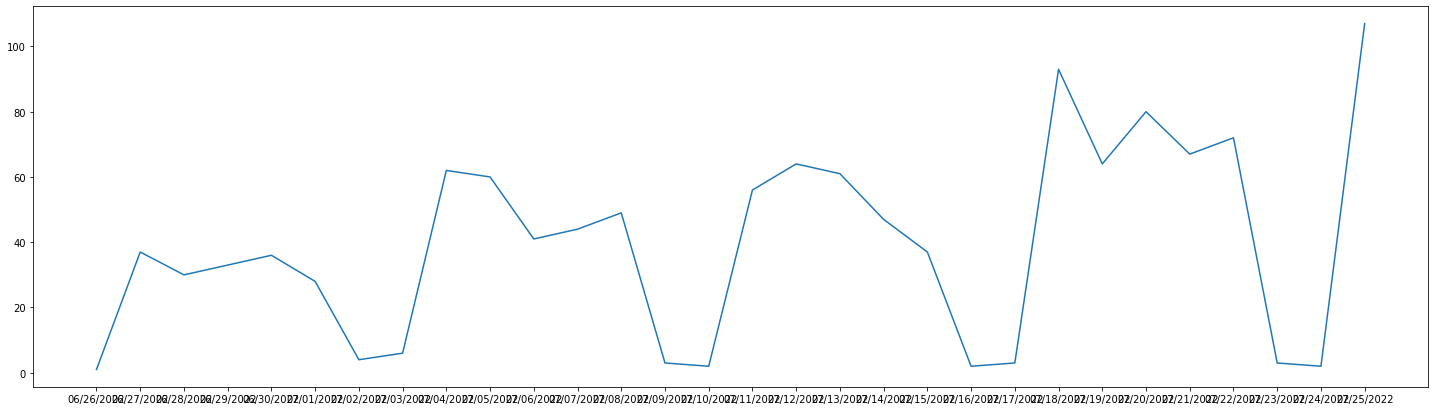

In [34]:
#Постройте график опубликованных вакансий по датам
import matplotlib.pyplot as plt

axs = plt.subplots(1, 1, figsize=(25, 7))
plt.plot(df2_date.index, df2_date.values)


In [79]:
#Найдите те вакансии с использованием python, которые вам интересны
list_vac = ['аналитик данных', 'data analyst']
df2_skills = df2[df2['name'].str.lower().str.contains('|'.join(list_vac))][['name', 'skills']]
df2_skills

,name,skills
10,Стажер Data Analyst,"[Python, SQL]"
63,Аналитик данных,"[Python, SCALA, Big Data, SQL, Java]"
165,Data Analyst / Data Engineer (Биометрия),"[Python, SQL, Linux, Английский язык, Numpy, P..."
169,Аналитик данных (campaign analyst),[]
182,Data Engineer / Data Analyst (SberData),"[Hadoop, NoSQL, Администрирование, Kafka]"
263,Data analyst,[]
270,Data Analyst SberDevices,"[Python, SQL, Анализ данных, ML, pandas, A/B т..."
271,Data Analyst,"[SQL, XML, kafka, JSON API, REST, Анализ данных]"
282,Аналитик данных (Лист-менеджер) в команду Кред...,[]
288,Аналитик данных Управление рыночных рисков,[]


In [143]:
list_skills = []
for j in range(len(df2_skills['skills'])):
  for i in range(len(df2_skills.iloc[j]['skills'])-1):
    list_skills.append(df2_skills.iloc[j]['skills'][i])

In [160]:
#Определите по полю skills какие навыки больше всего востребованы для этих вакансий
list_skills
df_skills_da = pd.DataFrame({'col':list_skills})
df_skills_da = df_skills_da.value_counts()[0:8]
df_skills_da

col          
SQL              7
Python           6
Анализ данных    3
Java             2
Big Data         2
ORACLE           2
Hadoop           2
Hive             2
dtype: int64

In [ ]:
df_skills_da = df_skills_da.reset_index(level=[0])

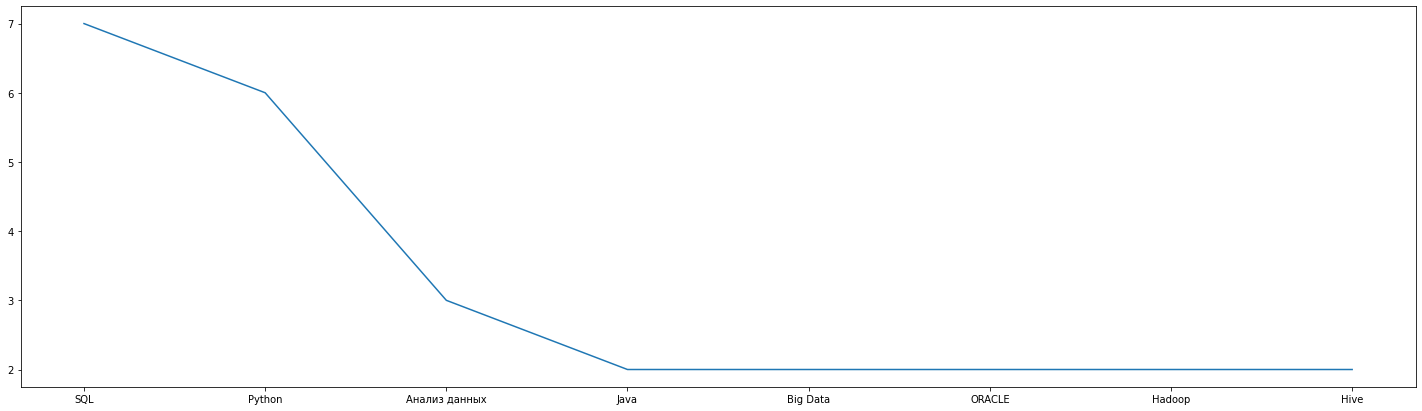

In [204]:
#Постройте график наиболее востребованных навыков для аналитика данных
axs = plt.subplots(1, 1, figsize=(25, 7))
plt.plot(df_skills_da['col'], df_skills_da[0])